In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In data frames: each column is a 'series'

The series types: 

In [6]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0     1
1     3
2     5
3   NaN
4     6
5     8
dtype: float64

In [9]:
A = np.random.randn(6,4)
A

array([[ 1.89297896,  0.8928974 ,  0.09530845,  1.60226128],
       [ 0.80672457, -1.20535739, -0.10890278,  0.1288688 ],
       [-0.3015062 , -0.83873683, -0.55553105,  0.6418696 ],
       [-0.32410503, -0.18489616,  0.15421813, -0.85385243],
       [-0.02088489,  0.49855909,  0.37061389, -1.33976284],
       [ 0.87286923, -0.15970236,  1.14908531,  1.18896601]])

In [12]:
pd.DataFrame(A, 
                 columns=["age","height","weight","color"],
                 index=("a","b","c","d","e","f"))

,age,height,weight,color
a,1.892979,0.892897,0.095308,1.602261
b,0.806725,-1.205357,-0.108903,0.128869
c,-0.301506,-0.838737,-0.555531,0.641870
d,-0.324105,-0.184896,0.154218,-0.853852
e,-0.020885,0.498559,0.370614,-1.339763
f,0.872869,-0.159702,1.149085,1.188966


In [20]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1,2013-01-02,1,3,test,foo
1,1,2013-01-02,1,3,train,foo
2,1,2013-01-02,1,3,test,foo
3,1,2013-01-02,1,3,train,foo


In [21]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
F            object
dtype: object

In [23]:
df2.columns

Index([u'A', u'B', u'C', u'D', u'E', u'F'], dtype='object')

In [24]:
df2.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [25]:
for column_name in df2.columns:
    print(column_name)

A
B
C
D
E
F


In [26]:
for row_name in df2.index:
    print(row_name)

0
1
2
3


In [27]:
for column_name in df2.columns:
    print((column_name), df2[column_name].dtype))

SyntaxError: invalid syntax (<ipython-input-27-9907ee48cf9b>, line 2)

In [28]:
df2.A

0    1
1    1
2    1
3    1
Name: A, dtype: float64

In [32]:
df2["T"] = [1, 2, "bob", "joe"]
df2

,A,B,C,D,E,F,T
0,1,2013-01-02,1,3,test,foo,1
1,1,2013-01-02,1,3,train,foo,2
2,1,2013-01-02,1,3,test,foo,bob
3,1,2013-01-02,1,3,train,foo,joe


In [33]:
df2.T

,0,1,2,3
A,1,1,1,1
B,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00
C,1,1,1,1
D,3,3,3,3
E,test,train,test,train
F,foo,foo,foo,foo
T,1,2,bob,joe


In [34]:
df2.max()

A                      1
B    2013-01-02 00:00:00
C                      1
D                      3
E                  train
F                    foo
T                    joe
dtype: object

In [35]:
df2.max(axis=0)

A                      1
B    2013-01-02 00:00:00
C                      1
D                      3
E                  train
F                    foo
T                    joe
dtype: object

In [36]:
df2.max(axis=1)

0    3
1    3
2    3
3    3
dtype: float64

In [37]:
df2.mean(axis=0)

A    1
C    1
D    3
dtype: float64

In [39]:
df2.head

<bound method DataFrame.head of    A          B  C  D      E    F    T
0  1 2013-01-02  1  3   test  foo    1
1  1 2013-01-02  1  3  train  foo    2
2  1 2013-01-02  1  3   test  foo  bob
3  1 2013-01-02  1  3  train  foo  joe>

In [40]:
df2.head(1)

,A,B,C,D,E,F,T
0,1,2013-01-02,1,3,test,foo,1


In [41]:
df2.tail(2)

,A,B,C,D,E,F,T
2,1,2013-01-02,1,3,test,foo,bob
3,1,2013-01-02,1,3,train,foo,joe


In [42]:
df2.loc[0,:]

A                      1
B    2013-01-02 00:00:00
C                      1
D                      3
E                   test
F                    foo
T                      1
Name: 0, dtype: object

In [43]:
df2.loc[1,:]

A                      1
B    2013-01-02 00:00:00
C                      1
D                      3
E                  train
F                    foo
T                      2
Name: 1, dtype: object

In [44]:
df2.loc[:,"D"]

0    3
1    3
2    3
3    3
Name: D, dtype: int32

In [45]:
df2.loc[[0,1], ["C","D"]]

,C,D
0,1,3
1,1,3


In [47]:
df2.loc[:,"E"]

0     test
1    train
2     test
3    train
Name: E, dtype: object

In [50]:
df2.loc[:,"E"] == "test"

0     True
1    False
2     True
3    False
Name: E, dtype: bool

In [51]:
df2.loc[df2.loc[:, "E"] == "test", :]

,A,B,C,D,E,F,T
0,1,2013-01-02,1,3,test,foo,1
2,1,2013-01-02,1,3,test,foo,bob


In [54]:
df2.loc[(df2.loc[:, "E"] == "test") & (df2.loc[:,"T"]),:]

,A,B,C,D,E,F,T
0,1,2013-01-02,1,3,test,foo,1
2,1,2013-01-02,1,3,test,foo,bob


In [55]:
pd.read_stata("/Users/cjlibassi/Dropbox/Classes/Econometrics/bothsexgalton.dta")

,rawid,famid,momheight,dadheight,midparent,childheight,sex
0,1,1,7.0,18.5,13.03,9.2,0
1,2,1,7.0,18.5,13.03,9.0,0
2,3,1,7.0,18.5,13.03,9.0,0
3,4,2,6.5,15.5,11.26,5.5,0
4,5,2,6.5,15.5,11.26,5.5,0
5,6,3,4.0,15.0,9.66,8.0,0
6,7,4,4.0,15.0,9.66,7.0,0
7,8,4,4.0,15.0,9.66,4.5,0
8,9,4,4.0,15.0,9.66,3.0,0
9,10,5,-1.5,15.0,6.69,6.5,0


In [56]:
galton = pd.read_stata("/Users/cjlibassi/Dropbox/Classes/Econometrics/bothsexgalton.dta")

In [57]:
galton

,rawid,famid,momheight,dadheight,midparent,childheight,sex
0,1,1,7.0,18.5,13.03,9.2,0
1,2,1,7.0,18.5,13.03,9.0,0
2,3,1,7.0,18.5,13.03,9.0,0
3,4,2,6.5,15.5,11.26,5.5,0
4,5,2,6.5,15.5,11.26,5.5,0
5,6,3,4.0,15.0,9.66,8.0,0
6,7,4,4.0,15.0,9.66,7.0,0
7,8,4,4.0,15.0,9.66,4.5,0
8,9,4,4.0,15.0,9.66,3.0,0
9,10,5,-1.5,15.0,6.69,6.5,0


In [58]:
print(galton.dtypes)

rawid            int16
famid            int16
momheight      float32
dadheight      float32
midparent      float32
childheight    float32
sex               int8
dtype: object


In [59]:
print(pd.isnull(galton).sum())

rawid          0
famid          0
momheight      0
dadheight      0
midparent      0
childheight    0
sex            0
dtype: int64


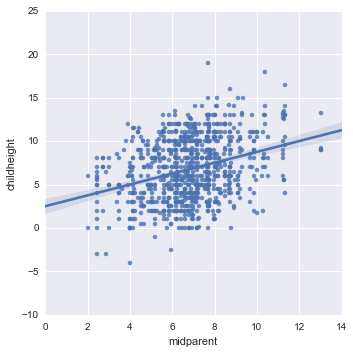

In [66]:
%matplotlib inline
sns.set()
sns.lmplot("midparent", "childheight", galton)